In [17]:
# importing required libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#reading the car data from csv file

data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\delhi.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Super Charger,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,No,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,No,5.3 metres,217 Kmph,10.5 Seconds,2360kg,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,No,4.8,217 Kmph,10.5 Seconds,1335,1530,1530,NaN,NaN,NaN
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,No,5.3 metres,165 Kmph,10.5 Seconds,1335,1530,1530,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,...,No,5.3 metres,195 Kmph,10 Seconds,1455kg,1490mm,1480mm,73.0 X 89.4 mm,10.3:1,190mm
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,...,No,5.3 metres,195 Kmph,10 Seconds,1455kg,1490mm,1480mm,73.0 X 89.4 mm,10.3:1,190mm
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,...,No,5.2 metres,196km/hr,10.5 Seconds,1455kg,1490mm,1480mm,77.0mm X 85.44mm,10.5;1,190mm
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,...,No,5.3 metres,160.58kmph,10.83 s,1455kg,1490mm,1480mm,77.0mm X 85.44mm,10.5;1,190mm


In [19]:
#check for null records
data.isnull().sum()

it                           0
ft                           0
bt                           1
km                           0
transmission                 0
                            ..
Front Tread                  3
Rear Tread                   3
BoreX Stroke                 7
Compression Ratio            7
Ground Clearance Unladen    11
Length: 68, dtype: int64

In [20]:
#column names
data.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission',
       'Year of Manufacture', 'Features', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Fuel Suppy System', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',
       'Cargo Volumn', 'Value Configuration', 'Super Charger',
       'Turning Radius', 'Top Speed', 'Acceleration', 'Gross Weight',

In [21]:
# dropping columns post feature selection
Delhi_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [22]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Mileage', 'Engine',
       'Max Power', 'Color', 'Seating Capacity'],
      dtype='object')

In [23]:
data.isnull().sum()  # check for null records 

bt                    1
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    1
Transmission          0
Mileage               0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
dtype: int64

In [24]:
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Mileage               object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
dtype: object

In [25]:
# column name renaming -standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,SUV,"10,000",1,Kia,Kia Seltos,2022,₹ 19 Lakh,Diesel,Third Party insurance,Automatic,18 kmpl,1493 CC,113.43bhp@4000rpm,Gray,5
1,SUV,"57,437",2,Hyundai,Hyundai Creta,2016,₹ 7.62 Lakh,Petrol,Zero Dep,Manual,15.29 kmpl,1591 CC,121.3bhp@6400rpm,White,5
2,SUV,"8,000",1,Mercedes-Benz,Mercedes-Benz GLC,2020,₹ 56 Lakh,Petrol,Comprehensive,Automatic,12.74 kmpl,1991 CC,197bhp@5500-6100rpm,Grey,5
3,Hatchback,"28,151",2,Maruti,Maruti Swift,2018,₹ 5.23 Lakh,Petrol,Comprehensive,Manual,22.38 kmpl,1197 CC,88.50bhp@6000rpm,Silver,5
4,SUV,"60,000",1,Hyundai,Hyundai Creta,2017,₹ 7.65 Lakh,Petrol,Third Party insurance,Manual,15.29 kmpl,1591 CC,121.3bhp@6400rpm,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,"60,000",1,Honda,Honda City,2019,₹ 9 Lakh,Petrol,Third Party insurance,Automatic,18 kmpl,1497 CC,117.6bhp@6600rpm,Others,5
1481,SUV,"20,000",1,Kia,Kia Sonet,2021,₹ 9.50 Lakh,Petrol,Third Party insurance,Manual,18.4 kmpl,1197 CC,81.86bhp@6000rpm,Others,5
1482,Sedan,"60,000",1,Hyundai,Hyundai Verna,2011,₹ 4.18 Lakh,Petrol,Third Party insurance,Manual,17.01 kmpl,1591 CC,121.3bhp@6300rpm,Others,5
1483,SUV,"38,000",1,Hyundai,Hyundai Creta,2019,₹ 11.95 Lakh,Diesel,Third Party insurance,Manual,20.5 kmpl,1582 CC,126.2bhp@4000rpm,Silver,5


In [26]:
# Function to convert lakh to numerical format
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [27]:
# Function to extract and convert max power in PS to BHP 
def extract_and_convert(power_str):
    # Check for BHP
    bhp_match = re.search(r'(\d+\.?\d*)\s*bhp', power_str, re.IGNORECASE)
    if bhp_match:
        return float(bhp_match.group(1))  # Return BHP as float
    
    ps_match = re.search(r"(\d+(\.\d*)?)", power_str, re.IGNORECASE)
    if ps_match:
        print(f"{power_str} --> {ps_match}")
        ps_value = float(ps_match.group(1).replace(',', ''))  # Remove commas
        return ps_value * 0.98632  # Convert PS to BHP
    
    return np.nan  # Return NaN if no match

In [28]:
# Column data type conversion with regex replace to get numerical data
data['Max_power']=data['Max_power'].apply(extract_and_convert).astype(float)


90 PS @ 6000 rpm --> <re.Match object; span=(0, 2), match='90'>
170PS @ 6000rpm --> <re.Match object; span=(0, 3), match='170'>
64@6,200 (PS@rpm) --> <re.Match object; span=(0, 2), match='64'>
75 @ 5,400 (PS@rpm) --> <re.Match object; span=(0, 2), match='75'>
90(66) @ 6200 --> <re.Match object; span=(0, 2), match='90'>
94 @ 5,550 (PS@rpm) --> <re.Match object; span=(0, 2), match='94'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
163.2@5,700 (PS@rpm) --> <re.Match object; span=(0, 5), match='163.2'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
105 PS at 5250 rpm --> <re.Match object; span=(0, 3), match='105'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
88.2@6000 (PS@rpm) --> <re.Match object; span=(0, 4), match='88.2'>
88.2@6000 (PS@rpm) --> <re.Match object; span=(0, 4), match='88.2'>
90(66) @ 6200 --> <re.Match object; span=(0, 2), match='90'>
118PS at 

In [29]:

# Column data conversion regex replace to get numerical data
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)



In [30]:

data


,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,SUV,10000,1,Kia,Kia Seltos,2022,1900000,Diesel,Third Party insurance,Automatic,18.00,1493,113.43,Gray,5
1,SUV,57437,2,Hyundai,Hyundai Creta,2016,762000,Petrol,Zero Dep,Manual,15.29,1591,121.30,White,5
2,SUV,8000,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000,Petrol,Comprehensive,Automatic,12.74,1991,197.00,Grey,5
3,Hatchback,28151,2,Maruti,Maruti Swift,2018,523000,Petrol,Comprehensive,Manual,22.38,1197,88.50,Silver,5
4,SUV,60000,1,Hyundai,Hyundai Creta,2017,765000,Petrol,Third Party insurance,Manual,15.29,1591,121.30,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,60000,1,Honda,Honda City,2019,900000,Petrol,Third Party insurance,Automatic,18.00,1497,117.60,Others,5
1481,SUV,20000,1,Kia,Kia Sonet,2021,950000,Petrol,Third Party insurance,Manual,18.40,1197,81.86,Others,5
1482,Sedan,60000,1,Hyundai,Hyundai Verna,2011,418000,Petrol,Third Party insurance,Manual,17.01,1591,121.30,Others,5
1483,SUV,38000,1,Hyundai,Hyundai Creta,2019,1195000,Diesel,Third Party insurance,Manual,20.50,1582,126.20,Silver,5


In [31]:
data.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity'],
      dtype='object')

In [32]:
data.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
dtype: object

In [33]:
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_Delhidata.csv',encoding='utf-8',index=False)

In [34]:
data.shape

(1485, 15)

In [35]:
print(data['No_of_owners'].unique())

[1 2 3 0 4 5]


In [36]:
print(data['Transmission'].unique())

['Automatic' 'Manual']


In [37]:
print(data['Model_Year'].unique())

[2022 2016 2020 2018 2017 2021 2019 2014 2023 2013 2008 2015 2010 2009
 2006 2012 2011 2007]


In [38]:
print(data['Fuel_type'].unique())

['Diesel' 'Petrol' 'CNG' 'Electric' 'LPG']


In [39]:
print(data['Car_type'].unique())

['SUV' 'Hatchback' 'Sedan' 'MUV' 'Coupe' 'Convertibles' nan 'Wagon'
 'Pickup Trucks']


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1484 non-null   object 
 1   Kms_driven        1485 non-null   int64  
 2   No_of_owners      1485 non-null   int64  
 3   Car_name          1485 non-null   object 
 4   Car_model         1485 non-null   object 
 5   Model_Year        1485 non-null   int64  
 6   Car_price         1485 non-null   int64  
 7   Fuel_type         1485 non-null   object 
 8   Insurance_type    1484 non-null   object 
 9   Transmission      1485 non-null   object 
 10  Mileage           1485 non-null   float64
 11  Engine            1485 non-null   int64  
 12  Max_power         1485 non-null   float64
 13  Color             1485 non-null   object 
 14  Seating_capacity  1485 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 174.2+ KB


In [41]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners       Car_name          Car_model  \
0           SUV       10000             1            Kia         Kia Seltos   
1           SUV       57437             2        Hyundai      Hyundai Creta   
2           SUV        8000             1  Mercedes-Benz  Mercedes-Benz GLC   
3     Hatchback       28151             2         Maruti       Maruti Swift   
4           SUV       60000             1        Hyundai      Hyundai Creta   
...         ...         ...           ...            ...                ...   
1480      Sedan       60000             1          Honda         Honda City   
1481        SUV       20000             1            Kia          Kia Sonet   
1482      Sedan       60000             1        Hyundai      Hyundai Verna   
1483        SUV       38000             1        Hyundai      Hyundai Creta   
1484        SUV        7000             0             MG         MG Gloster   

      Model_Year 

In [42]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1485.000000,1485.000000,1485.000000
mean,51460.945455,1.260606,2017.208754,1.380706e+06,18.750845,1529.920539,118.631436,5.224242
std,29926.818407,0.539632,3.444524,2.437743e+06,4.177725,543.204524,58.936843,0.686963
min,101.000000,0.000000,2006.000000,3.300000e+04,7.080000,0.000000,37.000000,2.000000
25%,29000.000000,1.000000,2015.000000,4.250000e+05,16.140000,1197.000000,81.830000,5.000000
50%,50000.000000,1.000000,2017.000000,6.530000e+05,18.690000,1373.000000,98.600000,5.000000
75%,70000.000000,1.000000,2020.000000,1.345000e+06,21.100000,1799.000000,140.000000,5.000000
max,230000.000000,5.000000,2023.000000,4.150000e+07,35.600000,4663.000000,576.630000,8.000000


In [43]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1484,1485,1485,1485,1484,1485,1485
unique,8,28,200,5,6,2,29
top,Hatchback,Maruti,Maruti Baleno,Petrol,Comprehensive,Manual,White
freq,537,399,75,1016,704,942,413


In [44]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,Vehicle_age
0,SUV,10000,1,Kia,Kia Seltos,2022,1900000,Diesel,Third Party insurance,Automatic,18.00,1493,113.43,Gray,5,2
1,SUV,57437,2,Hyundai,Hyundai Creta,2016,762000,Petrol,Zero Dep,Manual,15.29,1591,121.30,White,5,8
2,SUV,8000,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000,Petrol,Comprehensive,Automatic,12.74,1991,197.00,Grey,5,4
3,Hatchback,28151,2,Maruti,Maruti Swift,2018,523000,Petrol,Comprehensive,Manual,22.38,1197,88.50,Silver,5,6
4,SUV,60000,1,Hyundai,Hyundai Creta,2017,765000,Petrol,Third Party insurance,Manual,15.29,1591,121.30,White,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,60000,1,Honda,Honda City,2019,900000,Petrol,Third Party insurance,Automatic,18.00,1497,117.60,Others,5,5
1481,SUV,20000,1,Kia,Kia Sonet,2021,950000,Petrol,Third Party insurance,Manual,18.40,1197,81.86,Others,5,3
1482,Sedan,60000,1,Hyundai,Hyundai Verna,2011,418000,Petrol,Third Party insurance,Manual,17.01,1591,121.30,Others,5,13
1483,SUV,38000,1,Hyundai,Hyundai Creta,2019,1195000,Diesel,Third Party insurance,Manual,20.50,1582,126.20,Silver,5,5


In [45]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,SUV,10000,1,1900000,Diesel,Third Party insurance,Automatic,18.00,1493,113.43,5,2
1,SUV,57437,2,762000,Petrol,Zero Dep,Manual,15.29,1591,121.30,5,8
2,SUV,8000,1,5600000,Petrol,Comprehensive,Automatic,12.74,1991,197.00,5,4
3,Hatchback,28151,2,523000,Petrol,Comprehensive,Manual,22.38,1197,88.50,5,6
4,SUV,60000,1,765000,Petrol,Third Party insurance,Manual,15.29,1591,121.30,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,60000,1,900000,Petrol,Third Party insurance,Automatic,18.00,1497,117.60,5,5
1481,SUV,20000,1,950000,Petrol,Third Party insurance,Manual,18.40,1197,81.86,5,3
1482,Sedan,60000,1,418000,Petrol,Third Party insurance,Manual,17.01,1591,121.30,5,13
1483,SUV,38000,1,1195000,Diesel,Third Party insurance,Manual,20.50,1582,126.20,5,5


In [46]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 18 unique category : [ 2  8  4  6  7  3  5 10  1 11 16  9 14 15 18 12 13 17]


In [47]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,SUV,10000,1,1900000,Diesel,Third Party insurance,Automatic,18.00,1493,113.43,5,2
1,SUV,57437,2,762000,Petrol,Zero Dep,Manual,15.29,1591,121.30,5,8
2,SUV,8000,1,5600000,Petrol,Comprehensive,Automatic,12.74,1991,197.00,5,4
3,Hatchback,28151,2,523000,Petrol,Comprehensive,Manual,22.38,1197,88.50,5,6
4,SUV,60000,1,765000,Petrol,Third Party insurance,Manual,15.29,1591,121.30,5,7


Data Visualization

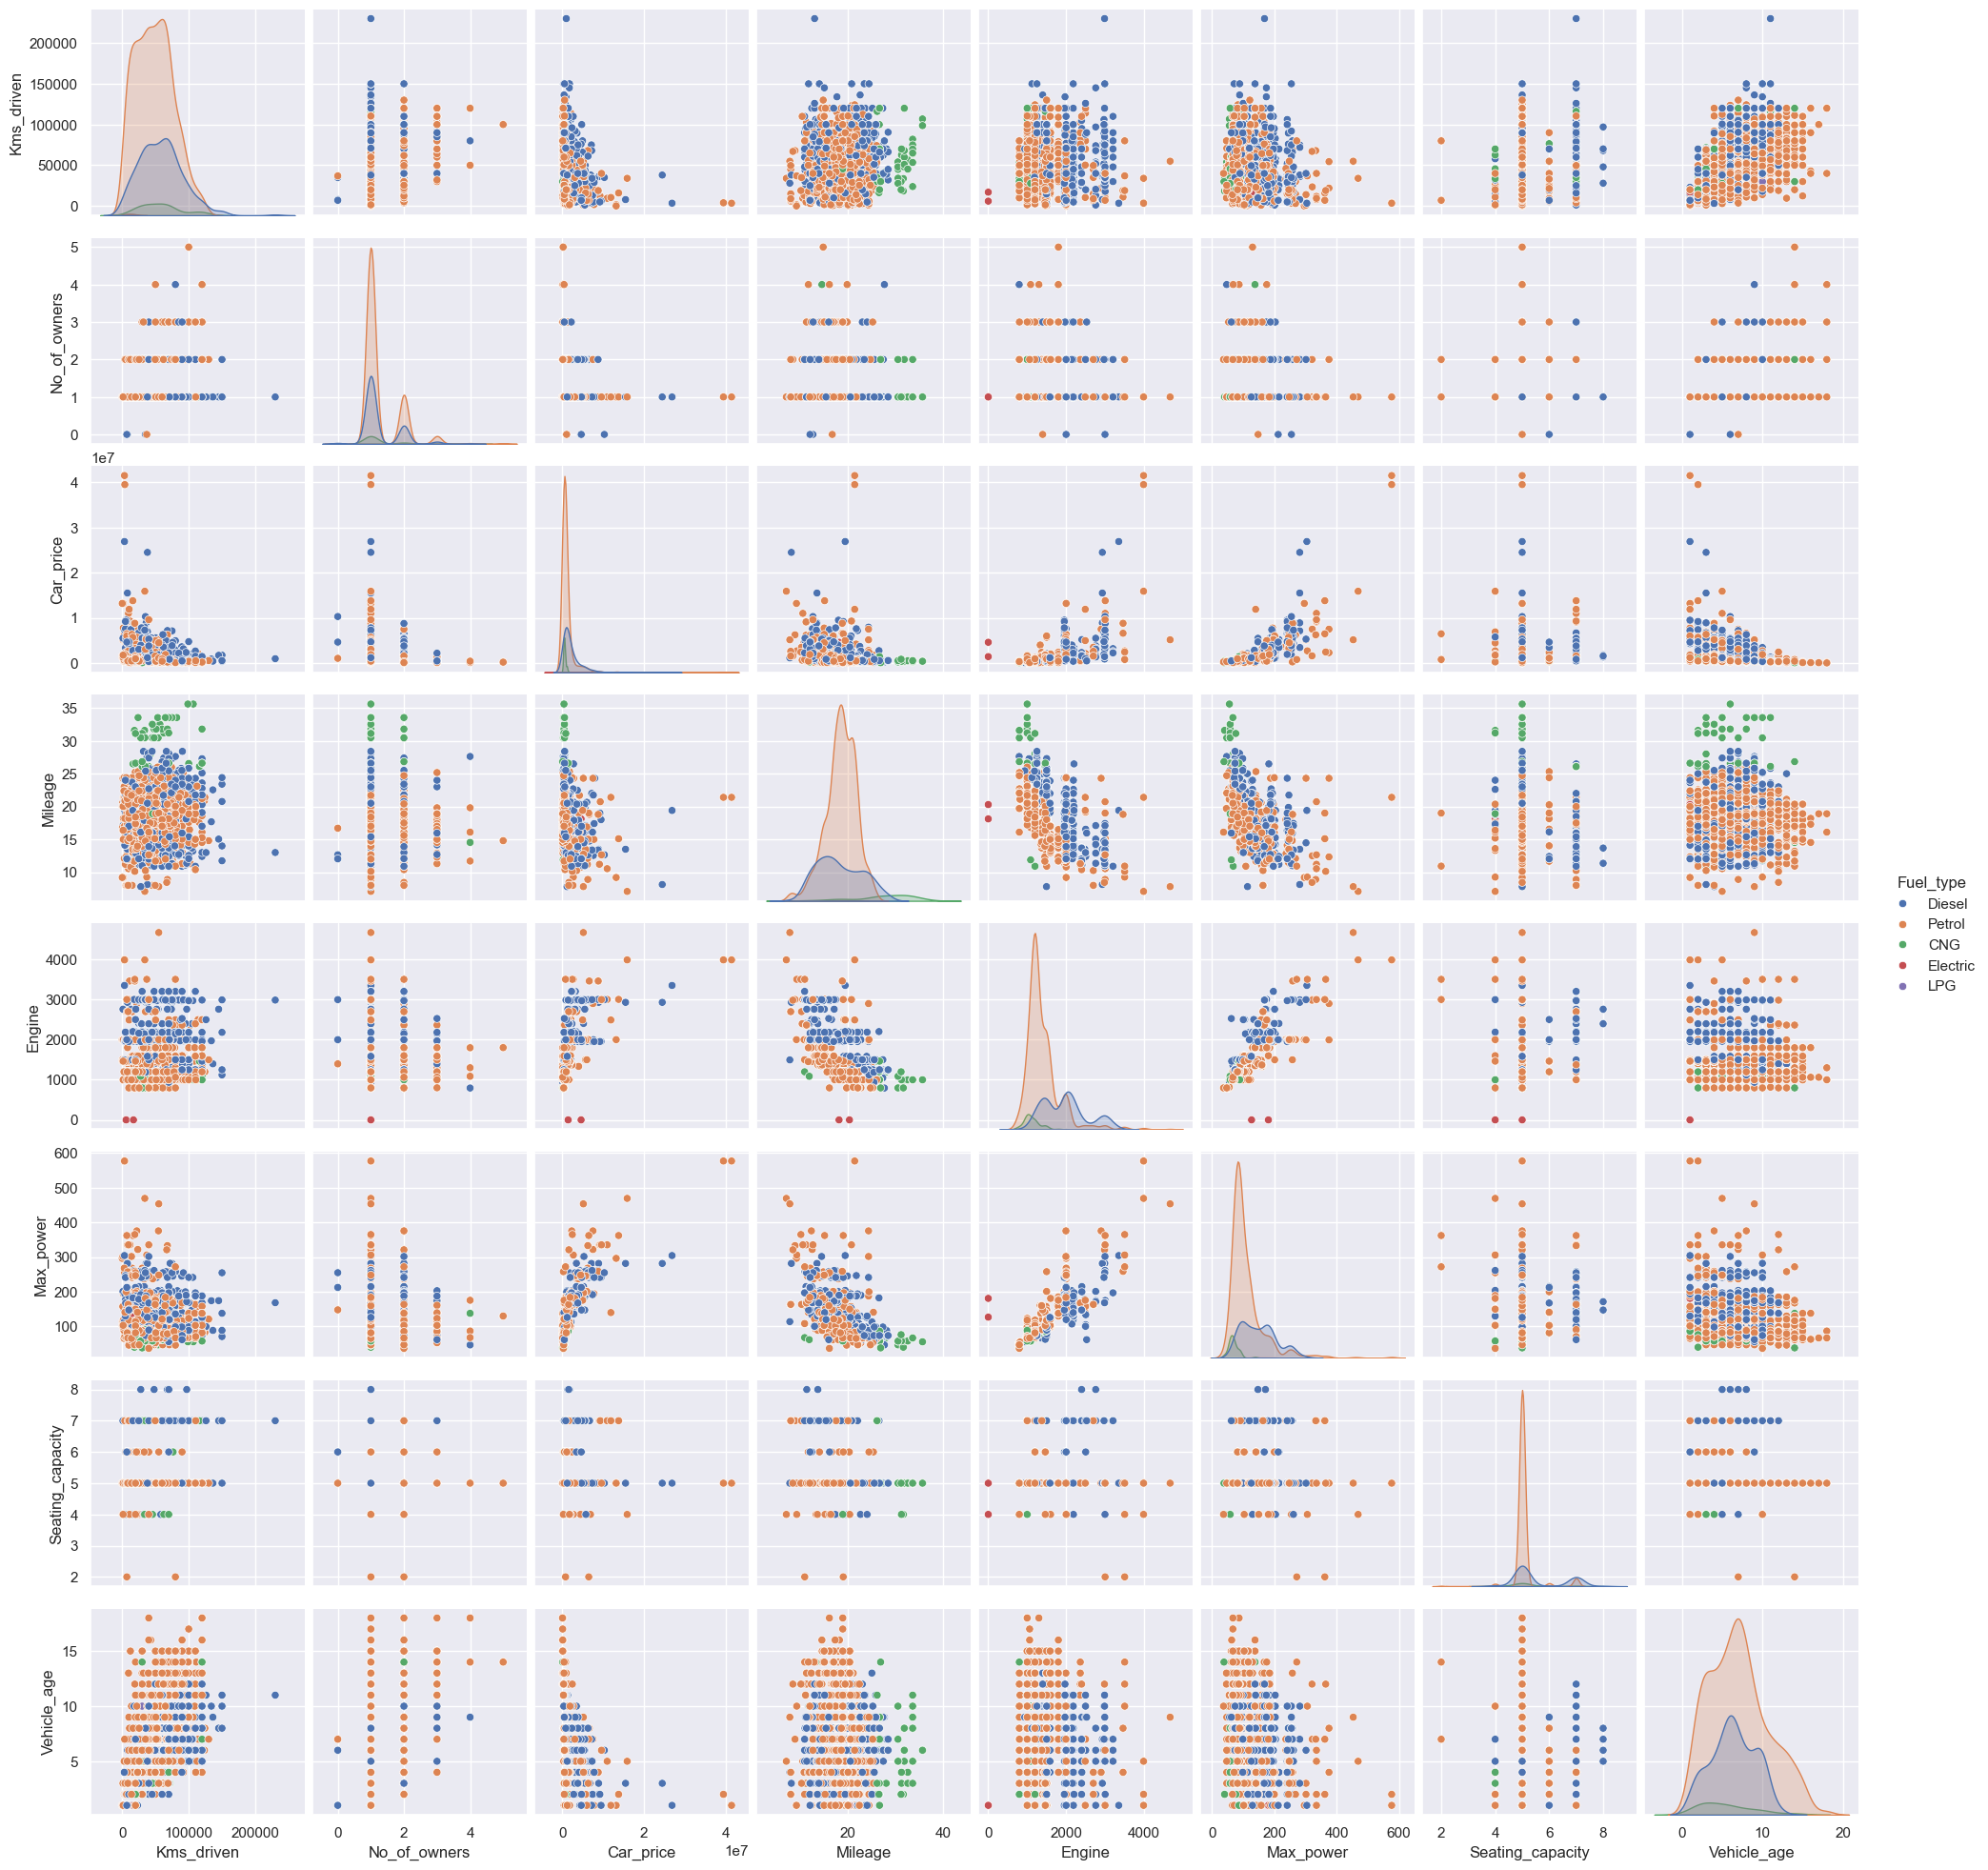

In [48]:
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

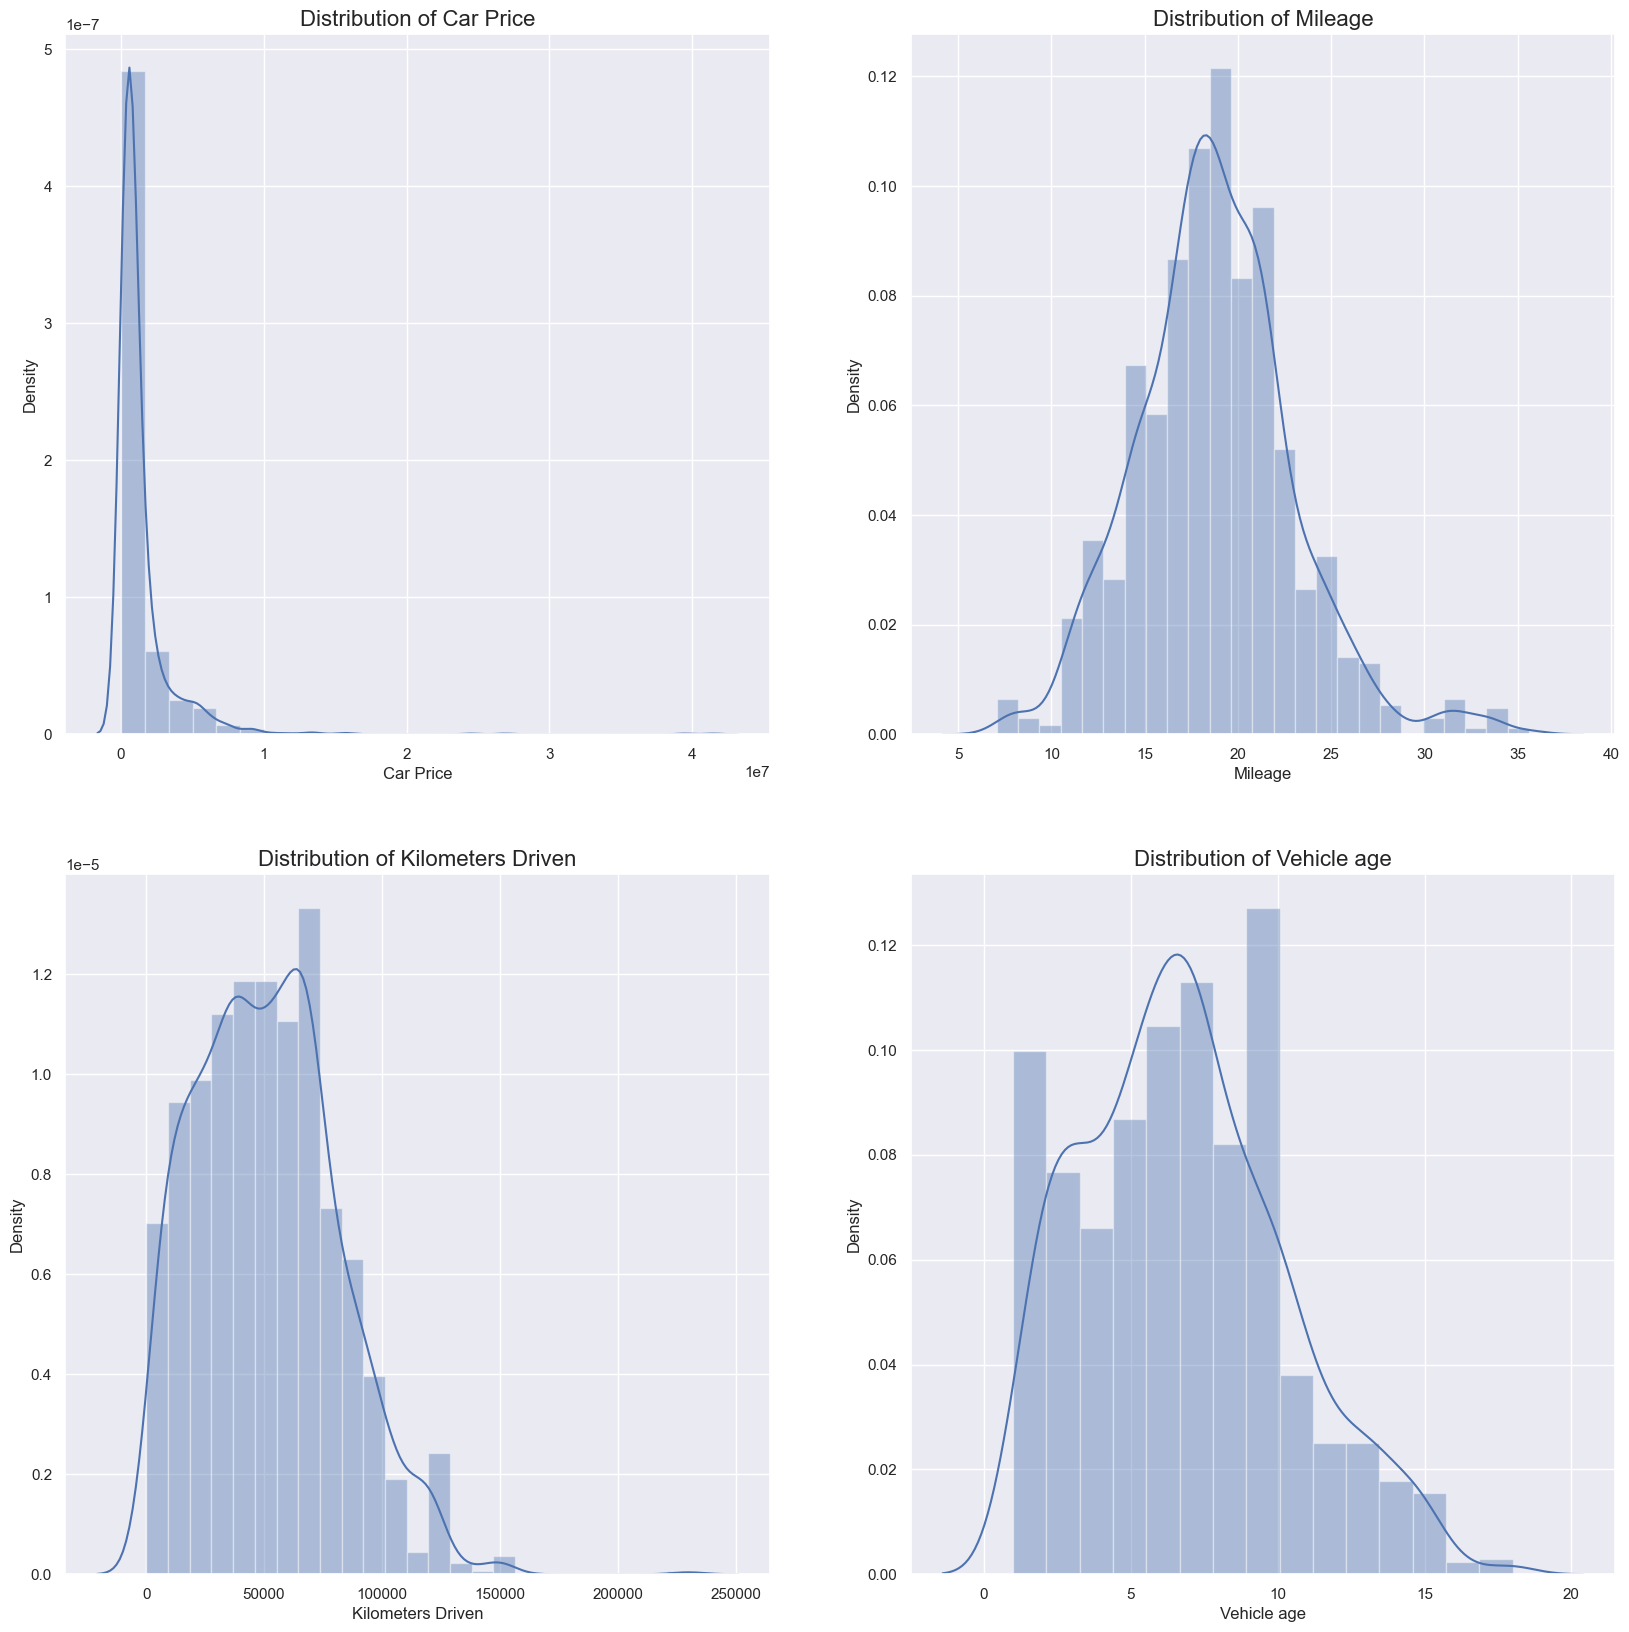

In [50]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


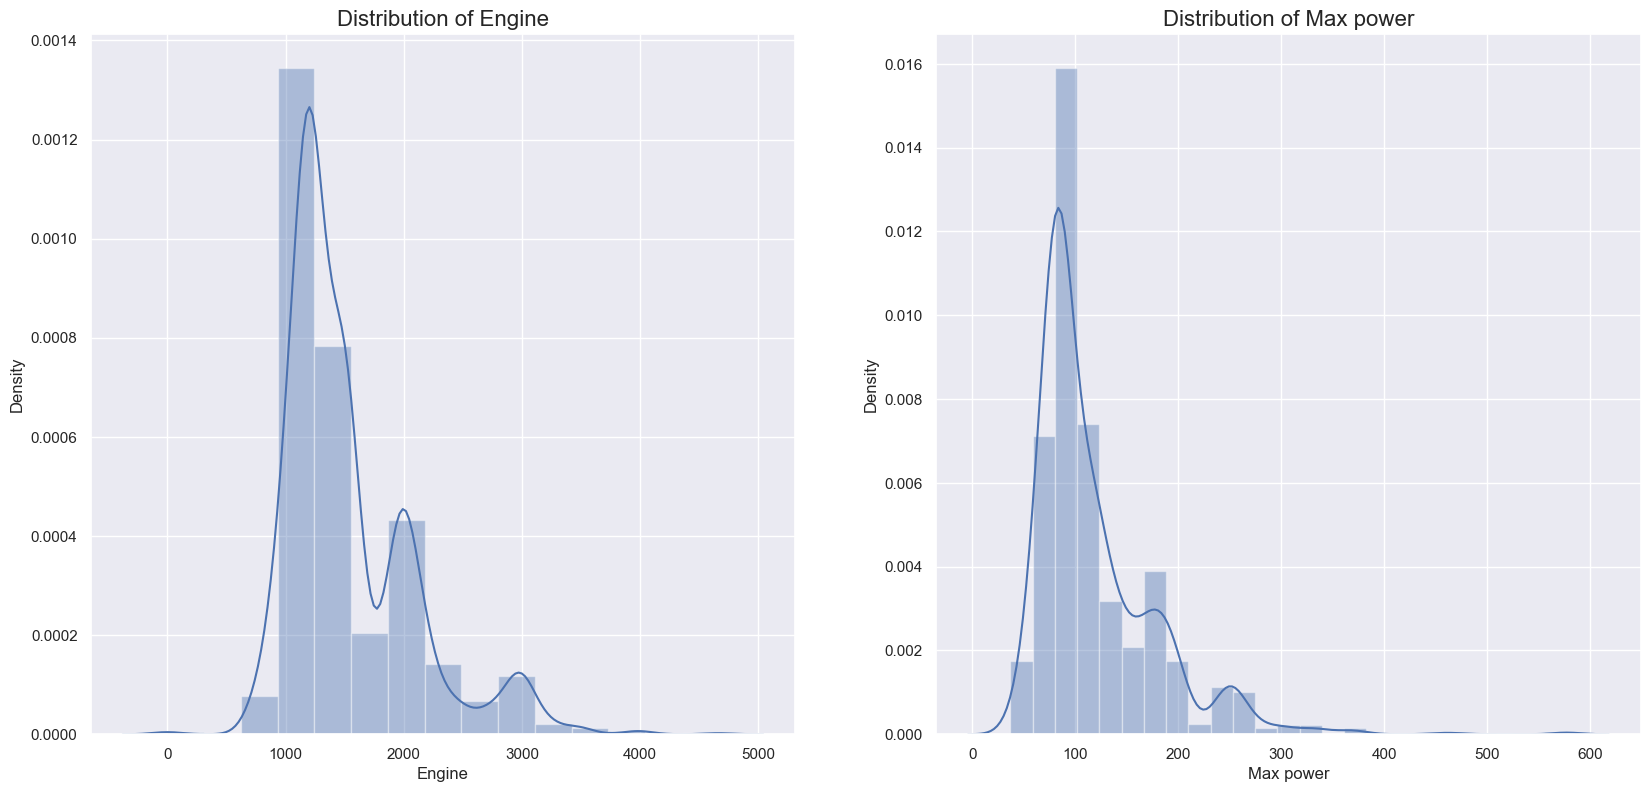

In [51]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [53]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,SUV,10000,1,1900000,Diesel,Third Party insurance,Automatic,18.00,1493,113.43,5,2
1,SUV,57437,2,762000,Petrol,Zero Dep,Manual,15.29,1591,121.30,5,8
2,SUV,8000,1,5600000,Petrol,Comprehensive,Automatic,12.74,1991,197.00,5,4
3,Hatchback,28151,2,523000,Petrol,Comprehensive,Manual,22.38,1197,88.50,5,6
4,SUV,60000,1,765000,Petrol,Third Party insurance,Manual,15.29,1591,121.30,5,7


In [54]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)
cat_col


['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

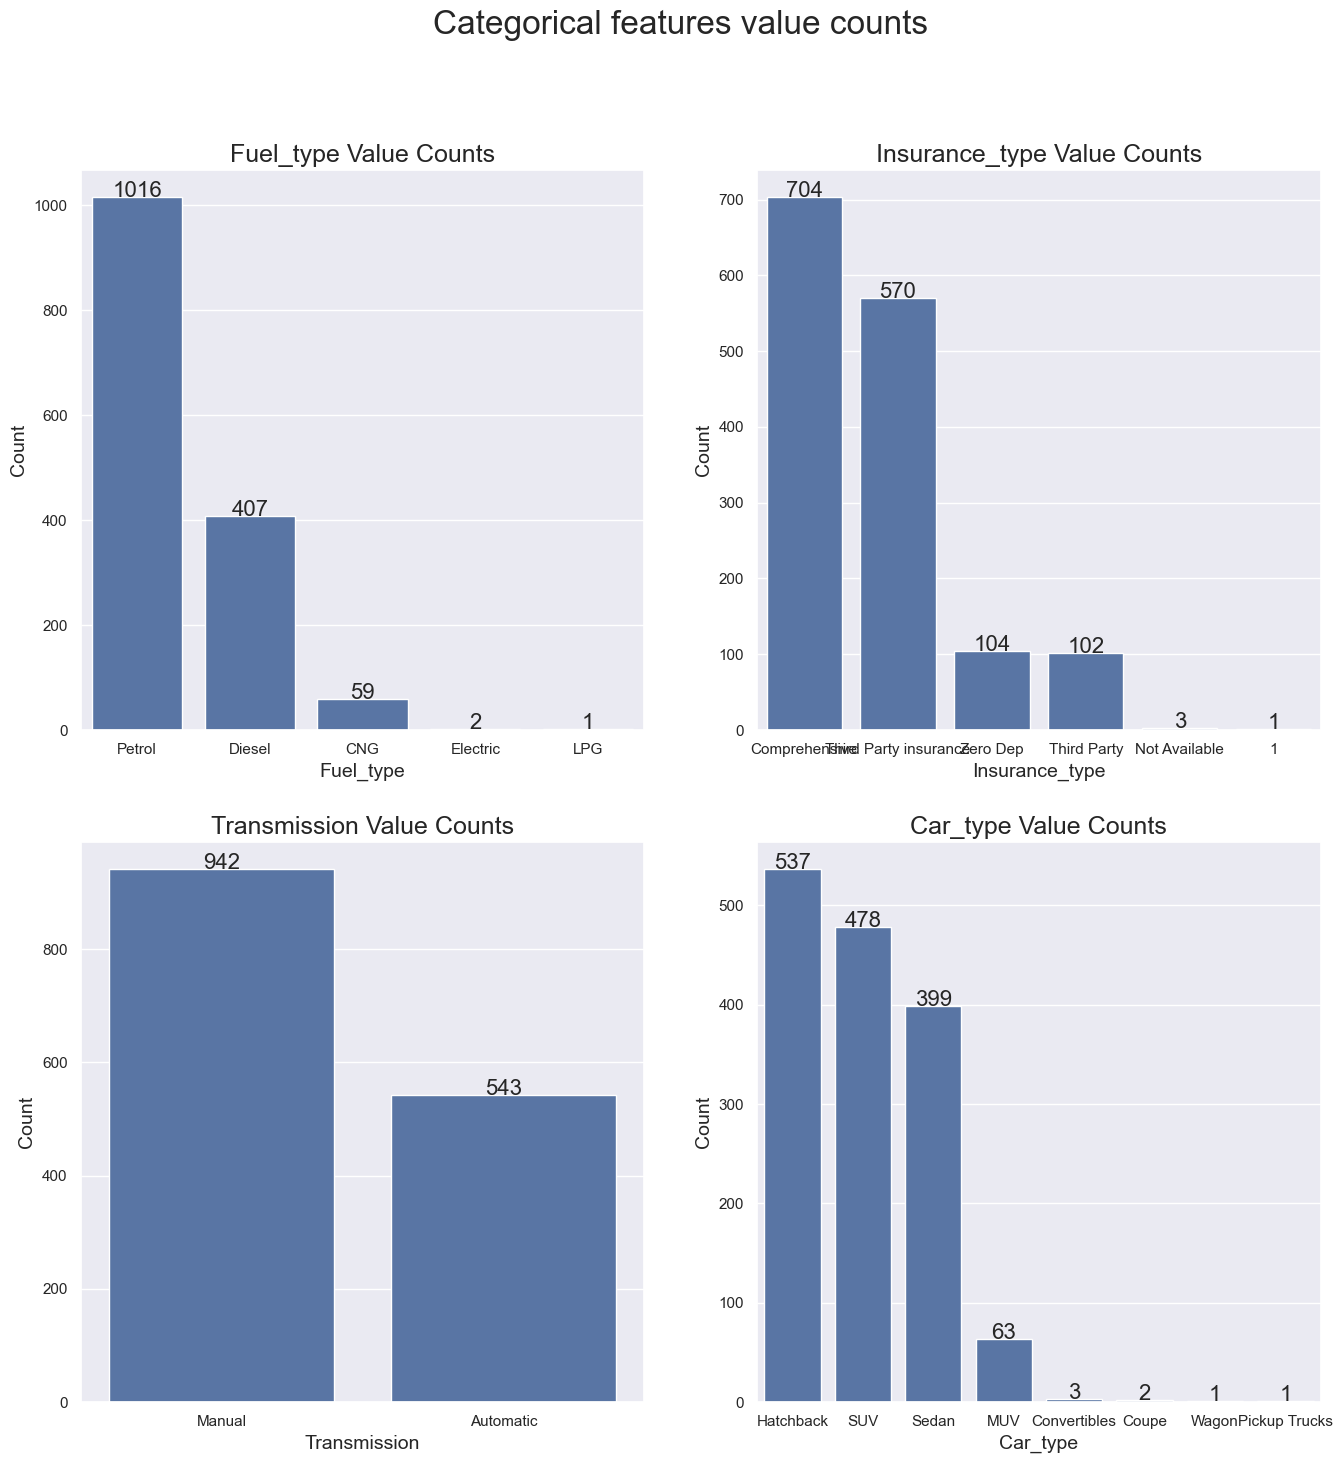

In [56]:
# Categorical columns analysis
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1